<a href="https://colab.research.google.com/github/KaranVyas7/StockPricePredictor/blob/main/kvStockPricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To get the data, we need to install the yfinance library. Yfinance provides us with a means to access market data from Yahoo.
!pip install yfinance

In [ ]:
# Importing libraries
import pandas as pd # Pandas is a library that allows us to store our data into dataframes (tables) and manipulate our data
import numpy as np # Numpy is a library that allows us to work with arrays and matricies
import matplotlib.pyplot as plt # Plotting library
import seaborn as sns # Plotting library

# Importing the deep learning libraries
import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU

# Importing other libraries
import yfinance as yf # Yfinance will provide an API to access the current stock market data
from sklearn.model_selection import train_test_split # Scikit-Learn is a huge Machine Learning Library for classical ML.

%matplotlib inline

In [ ]:
# Getting the data
company = 'AAPL' # This the company we are predicting the stock prices of. Feel free to change this.
stock_data = yf.Ticker(company)

# Getting the history of the stock
stock_history = stock_data.history(period='max',interval='1d') # We are getting all the daily stock data.

# Looking at what the data is
stock_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-21 00:00:00-05:00,196.100006,197.080002,193.500000,194.679993,46482500,0.0,0.0
2023-12-22 00:00:00-05:00,195.179993,195.410004,192.970001,193.600006,37122800,0.0,0.0
2023-12-26 00:00:00-05:00,193.610001,193.889999,192.830002,193.050003,28919300,0.0,0.0


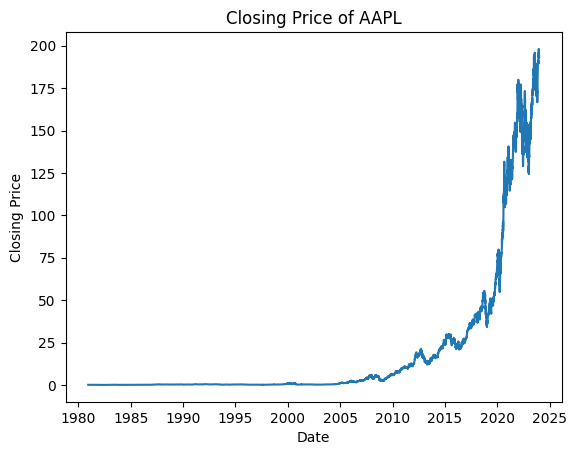

In [ ]:
# In our case, we want to predict the closing price of the stock.
# Closing price is the price the stock is at when the stock market closes (5 PM EST)
# Let's plot the closing price for Apple to see what the trend is
closing_prices = stock_history['Close']
plt.title(f'Closing Price of {company}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(closing_prices)
plt.show()

Model Building
---



In [ ]:
# We need to split our data into training and testing
# We need to split it for this one.
# For this, we can utilize sklearn's train_test_split function that allows us to randomly split data
# in a way that can build the best models
training_data, testing_data = train_test_split(stock_history,test_size=0.2,random_state=42,shuffle=True)

# Essentially, the line above tells us to perform a 80/20 train/test split. We want to keep some data for testing,
# The random_state parameter ensures that our split is the same each time we run this notebook

In [ ]:
# Splitting the training data into X and y
X_train = training_data.drop(['Close','Volume','Dividends','Stock Splits'],axis=1)
y_train = training_data['Close']

# Splitting the testing data into X and y
X_test = testing_data.drop(['Close','Volume','Dividends','Stock Splits'],axis=1)
y_test = testing_data['Close']

### Artificial Neural Network: Base Model


In [ ]:
# Building the model
ann_model = Sequential()
ann_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones',input_shape=(X_train.shape[1],1)))
ann_model.add(Dropout(rate=0.2))
ann_model.add(Dense(50,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
ann_model.add(Dropout(rate=0.2))
ann_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
ann_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

# Checking what the model looks like:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3, 25)             50        
                                                                 
 dropout (Dropout)           (None, 3, 25)             0         
                                                                 
 dense_1 (Dense)             (None, 3, 50)             1300      
                                                                 
 dropout_1 (Dropout)         (None, 3, 50)             0         
                                                                 
 dense_2 (Dense)             (None, 3, 25)             1275      
                                                                 
 dense_3 (Dense)             (None, 3, 1)              26        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10

In [ ]:
# Training the model
optimizer = keras.optimizers.SGD(learning_rate=0.03)
loss_function = keras.losses.MeanSquaredError()
ann_model.compile(optimizer=optimizer,loss=loss_function)

In [ ]:
# Model training
history = ann_model.fit(X_train,y_train,batch_size=32,epochs=50,shuffle=True)

Epoch 1/50
168/168 [==============================] - 8s 10ms/step - loss: 1961897171615744.0000
Epoch 2/50
168/168 [==============================] - 1s 8ms/step - loss: 117930490593280.0000
Epoch 3/50
168/168 [==============================] - 1s 8ms/step - loss: 3727.8115
Epoch 4/50
168/168 [==============================] - 2s 9ms/step - loss: 3727.8115
Epoch 5/50
168/168 [==============================] - 2s 9ms/step - loss: 3727.8105
Epoch 6/50
168/168 [==============================] - 2s 9ms/step - loss: 3727.8098
Epoch 7/50
168/168 [==============================] - 1s 8ms/step - loss: 3727.8113
Epoch 8/50
168/168 [==============================] - 1s 7ms/step - loss: 3727.8101
Epoch 9/50
168/168 [==============================] - 1s 8ms/step - loss: 3727.8101
Epoch 10/50
168/168 [==============================] - 1s 8ms/step - loss: 3727.8115
Epoch 11/50
168/168 [==============================] - 2s 9ms/step - loss: 3727.8108
Epoch 12/50
168/168 [=============================

In [ ]:
# What is the model performance
training_loss = ann_model.evaluate(X_train,y_train,batch_size=32,verbose=0)

# Note, the loss the squared difference between the truth and the prediction
# hence the loss value is in dollars squared. To see how far off our model was,
# we need to square root the loss.
print(f'Training Loss in Dollars: ${np.sqrt(training_loss)}')

Training Loss in Dollars: $61.05579463567525


In [ ]:
# What is the model performance on the test set?
testing_loss = ann_model.evaluate(X_test,y_test,batch_size=32,verbose=0)
print(f'Testing Loss in Dollars: ${np.sqrt(testing_loss)}')

Testing Loss in Dollars: $59.29143173303479


### Sequence Models

We can solve this problem better by leveraging sequence models.

In [ ]:
# To leverage sequence models, we need to utilize sequence data
# The current format of the data is one of a matrix, where each row is independent from each other.
# We need to transform it into a sequence
# Essentially, we need to make sure that each date has a sequence of past stock data that we can utilize for prediction
# For this problem, we will utilize sequences of length 10, meaning each prediction will rely on the last 10 days worth of stock data.
# If a date doesn't have 10 days worth of past stock data, we "pad" it. Remember in CNNs, we discussed how padding the image
# means we add 0s all around the image.
# In sequences, padding means we add the 0 vector until the sequence reaches the desired length (10).

raw_sequence_data_X = []
raw_sequence_data_Y = []
data_list = stock_history.drop(['Volume','Dividends','Stock Splits'],axis=1).values
# Iterating through each example in the stock data
for i in range(len(data_list)):
  sequence = [[0]*4] * 10 # creating a list of ten zeros

  # Checking if there are 10 days worth of past stock data
  if i < 10:
    for x in range(i):
      sequence[x] = list(data_list[x])
  else:
    index = 0
    for x in range(i-10,i):
      sequence[index] = list(data_list[x])
      index += 1
  raw_sequence_data_X.append(sequence)
  raw_sequence_data_Y.append(data_list[i][3])

In [ ]:
# Changing the lists into numpy arrays
sequence_X = np.array(raw_sequence_data_X)
sequence_Y = np.array(raw_sequence_data_Y)

# Checking the shape
sequence_X.shape

(6700, 10, 4)

In [ ]:
# Finally, we need to split this data into training and testing
X_train, X_test, y_train, y_test = train_test_split(sequence_X,sequence_Y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
# Implementing a basic RNN model for the project
rnn_model = Sequential()

# The 50 refers to how big we want our output vector, a_t, to be. In this case, we want it to be 50 dimensional.
# You can think of each row as containing some kind of feature regarding the data.
rnn_model.add(SimpleRNN(50,activation='tanh',bias_initializer='ones',return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))

# At the end of our RNN, we will get a 50 dimensional vector as our output.
# We need a single number so we will add an ANN on top of this RNN.
rnn_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
rnn_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

# Checking what the model looks like:
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2750      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 4051 (15.82 KB)
Trainable params: 4051 (15.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
optimizer = keras.optimizers.SGD(learning_rate=0.001)
loss_function = keras.losses.MeanSquaredError()
rnn_model.compile(optimizer=optimizer,loss=loss_function)

In [ ]:
# Model training
history = rnn_model.fit(X_train,y_train,batch_size=32,epochs=5,shuffle=True)

Epoch 1/5
168/168 [==============================] - 3s 8ms/step - loss: 3727.8101
Epoch 2/5
168/168 [==============================] - 1s 8ms/step - loss: 3727.8115
Epoch 3/5
168/168 [==============================] - 1s 8ms/step - loss: 3727.8101
Epoch 4/5
168/168 [==============================] - 1s 8ms/step - loss: 3727.8108
Epoch 5/5
168/168 [==============================] - 1s 8ms/step - loss: 3727.8105


In [ ]:
# Evaluating the model
training_loss = rnn_model.evaluate(X_train,y_train,batch_size=32,verbose=0)
print(f'Training Loss in Dollars: ${np.sqrt(training_loss)}')

Training Loss in Dollars: $61.05579463567525


In [ ]:
# Evaluating the model
testing_loss = rnn_model.evaluate(X_test,y_test,batch_size=32,verbose=0)
print(f'Testing Loss in Dollars: ${np.sqrt(testing_loss)}')

Testing Loss in Dollars: $59.29143173303479


### Gated Recurrent Unit (GRU)


In [ ]:
# Building the GRU model
gru_model = Sequential()
gru_model.add(GRU(50,activation='tanh',bias_initializer='ones',return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))

# At the end of our GRU, we will get a 40 dimensional vector as our output.
# We need a single number so we will add an ANN on top of this RNN.
gru_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
gru_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

# Checking what the model looks like:
gru_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                8400      
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 9701 (37.89 KB)
Trainable params: 9701 (37.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
optimizer = keras.optimizers.SGD(learning_rate=0.001)
loss_function = keras.losses.MeanSquaredError()
gru_model.compile(optimizer=optimizer,loss=loss_function)

In [ ]:
# Model training
history = gru_model.fit(X_train,y_train,batch_size=32,epochs=5,shuffle=True)

Epoch 1/5
168/168 [==============================] - 3s 4ms/step - loss: 3727.8108
Epoch 2/5
168/168 [==============================] - 1s 4ms/step - loss: 3727.8101
Epoch 3/5
168/168 [==============================] - 1s 4ms/step - loss: 3727.8101
Epoch 4/5
168/168 [==============================] - 1s 4ms/step - loss: 3727.8108
Epoch 5/5
168/168 [==============================] - 1s 4ms/step - loss: 3727.8113


In [ ]:
# Evaluating the model
training_loss = gru_model.evaluate(X_train,y_train,batch_size=32,verbose=0)
print(f'Training Loss in Dollars: ${np.sqrt(training_loss)}')

Training Loss in Dollars: $61.05579463567525


In [ ]:
# Evaluating the model
testing_loss = gru_model.evaluate(X_test,y_test,batch_size=32,verbose=0)
print(f'Testing Loss in Dollars: ${np.sqrt(testing_loss)}')

Testing Loss in Dollars: $59.29143173303479


#### LSTM (Best)


In [ ]:
# Building the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(30,activation='tanh',recurrent_activation='sigmoid',bias_initializer='ones',return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))

# At the end of our LSTM, we will get a 50 dimensional vector as our output.
# We need a single number so we will add an ANN on top of this RNN.
lstm_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
lstm_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

# Checking what the model looks like:
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                4200      
                                                                 
 dense_8 (Dense)             (None, 25)                775       
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 5001 (19.54 KB)
Trainable params: 5001 (19.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
optimizer = keras.optimizers.SGD(learning_rate=0.001)
loss_function = keras.losses.MeanSquaredError()
lstm_model.compile(optimizer=optimizer,loss=loss_function)

In [ ]:
# Model training
history = lstm_model.fit(X_train,y_train,batch_size=32,epochs=5,shuffle=True)

Epoch 1/5
168/168 [==============================] - 2s 4ms/step - loss: 2397.5691
Epoch 2/5
168/168 [==============================] - 1s 4ms/step - loss: 2497.2488
Epoch 3/5
168/168 [==============================] - 1s 4ms/step - loss: 2489.1609
Epoch 4/5
168/168 [==============================] - 1s 4ms/step - loss: 2190.6714
Epoch 5/5
168/168 [==============================] - 1s 4ms/step - loss: 3246.0903


In [ ]:
# Evaluating the model
training_loss = lstm_model.evaluate(X_train,y_train,batch_size=32,verbose=0)
print(f'Training Loss in Dollars: ${np.sqrt(training_loss)}')

Training Loss in Dollars: $55.059473792408106


In [ ]:
# Evaluating the model
testing_loss = lstm_model.evaluate(X_test,y_test,batch_size=32,verbose=0)
print(f'Testing Loss in Dollars: ${np.sqrt(testing_loss)}')

Testing Loss in Dollars: $53.421159782430784
